In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.ensemble import IsolationForest
from matplotlib import cm
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
hackers=np.array([])

In [4]:
def ReadData(datasetName):
    all_data=pd.read_csv(datasetName)
    print(all_data.shape)
    all_data.head()
    train=all_data.iloc[:,1:3]
    print(train.shape)
    train.head()
    x=train.values
    plt.scatter(x[:,0],x[:,1])
    return train

In [5]:
def Isolation_Forest(train):
  rs=np.random.RandomState(0)
  clf = IsolationForest(max_samples=100,random_state=rs, contamination=.008) 
  clf.fit(train)
  if_scores = clf.decision_function(train)
  labels=clf.predict(train)
  if_anomalies=train[labels==-1];
  cmap=np.array(['white','red'])
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c='white',s=20,edgecolor='k')
  plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
  plt.title('Isolation Forests')
  if_anomalies_index=np.where(labels==-1)
  print(if_anomalies_index)
  return if_anomalies_index

In [14]:
def elliptic_envelope(train):
  clf = EllipticEnvelope(contamination=0.01,random_state=0)
  clf.fit(train)
  ee_scores = pd.Series(clf.decision_function(train)) 
  ee_predict = clf.predict(train)
  ee_anomalies = train.iloc[ee_predict==-1]
  print(ee_anomalies)
  cmap=np.array(['white','red'])
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c='white',s=20,edgecolor='k')
  plt.scatter(ee_anomalies.iloc[:,0],ee_anomalies.iloc[:,1],c='red',marker='x',s=10)
  plt.title('Elliptic Envelope')
  ee_anomalies_index=np.where(ee_predict==-1)
  return ee_anomalies_index

In [6]:
def dbscan(train):
  outliers_df_index=0
  folds = 10
  split = int(len(train)/10)
  folds_list = []
  start_index = 0
  
  for i in range(folds):
    folds_list.append(train[start_index:start_index+split])
    start_index= start_index+split
  rows,cols = 3,4
  folds_counter = 0
  for i in range(rows):
    for j in range(cols):
      if folds_counter >= len(folds_list):
        folds_counter = len(folds_list) -1
      x=folds_list[folds_counter].values
      dbscan = DBSCAN(eps= 0.085, min_samples=1000, metric='euclidean').fit(x)
      outliers_df=x[dbscan.labels_==-1]
      clusters_df=x[dbscan.labels_!=-1]
      colors=dbscan.labels_
      colors_clusters='white'
      color_outliers='red'
      fig=plt.figure()
      ax=fig.add_axes([.1, .1, 1, 1])
      plt.title('DBSCAN')
      ax.scatter(clusters_df[:,0], clusters_df[:,1] ,c =colors_clusters, edgecolors='black', s=50)
      ax.scatter(outliers_df[:,0], outliers_df[:,1],c =color_outliers, edgecolors='black', s=50)
      update_indexes = [i+(folds_counter * split) for i in list(np.where(dbscan.labels_==-1))]
      outliers_df_index=np.append(outliers_df_index,update_indexes)
    
      folds_counter = folds_counter+1
 # print(outliers_df_index)
 # print(outliers_df_index[:])
  return outliers_df_index[:]

In [7]:
def kNN(train):
  x=train.values
  nbrs= NearestNeighbors(n_neighbors=5)
  nbrs.fit(x)
  distances,indexes=nbrs.kneighbors(x)
  anomali_index= np.where(distances.mean(axis=1)>0.01) 
  plt.scatter(x[:,0],x[:,1])
  plt.scatter(x[anomali_index,0],x[anomali_index,1])
  return anomali_index

(87898, 3)
(87898, 2)


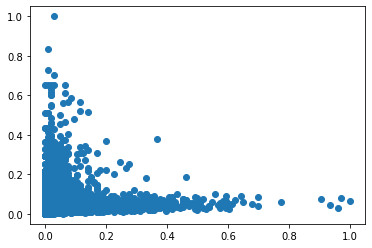

In [8]:
train=ReadData('/content/drive/MyDrive/Thesis_PUBG/Headshots.csv')


(87898, 3)
(87898, 2)


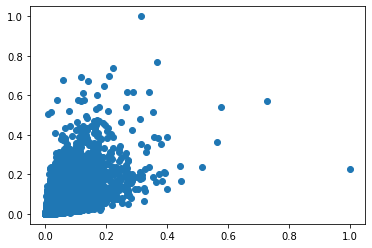

In [19]:
train=ReadData('/content/drive/MyDrive/Thesis_PUBG/Kill_Ride.csv')

(87898, 3)
(87898, 2)


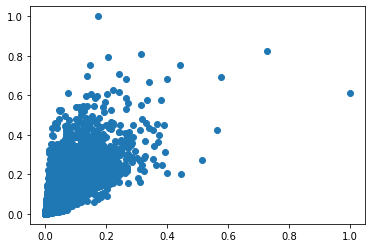

In [26]:
train=ReadData('/content/drive/MyDrive/Thesis_PUBG/Kill_Walk.csv')

(array([   25,    32,    53,    60,    66,    94,   102,   121,   122,
         125,   128,   154,   155,   157,   162,   173,   195,   202,
         226,   281,   283,   289,   307,   308,   323,   324,   335,
         353,   389,   393,   406,   430,   448,   453,   472,   503,
         505,   507,   509,   532,   536,   539,   580,   590,   592,
         596,   646,   652,   655,   662,   671,   690,   706,   717,
         761,   777,   779,   787,   799,   810,   815,   822,   838,
         842,   843,   848,   856,   889,   900,   924,   959,   973,
         974,   995,  1013,  1024,  1054,  1064,  1107,  1120,  1192,
        1226,  1237,  1249,  1262,  1283,  1359,  1391,  1395,  1420,
        1430,  1484,  1554,  1565,  1599,  1605,  1688,  1694,  1743,
        1758,  1765,  1810,  1837,  1852,  1888,  1894,  1906,  1919,
        1924,  1949,  1953,  1957,  1994,  2027,  2047,  2052,  2109,
        2136,  2142,  2147,  2193,  2205,  2225,  2260,  2269,  2305,
        2316,  2317

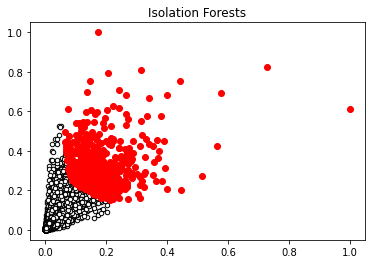

In [27]:
Outliers_IF=np.asarray(Isolation_Forest(train))

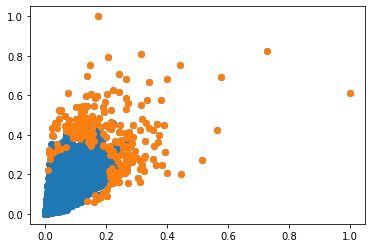

In [28]:
Outliers_kNN= np.asarray(kNN(train))


       solo_Kills  solo_WalkDistance
24       0.187127           0.152447
25       0.188573           0.178250
40       0.173748           0.157118
60       0.169770           0.391480
94       0.214789           0.269941
...           ...                ...
87177    0.211354           0.186283
87538    0.050805           0.243203
87786    0.190562           0.405595
87797    0.046827           0.228243
87840    0.080456           0.283904

[879 rows x 2 columns]


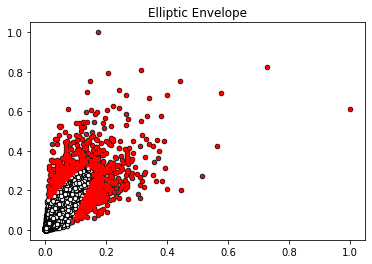

In [29]:
Outliers_EE=np.asarray(elliptic_envelope(train))


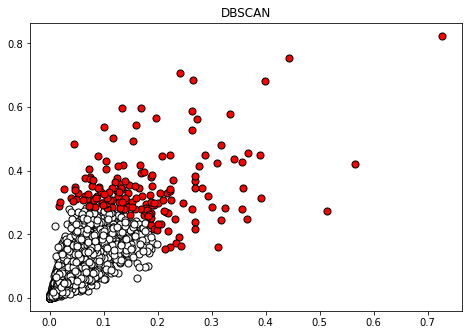

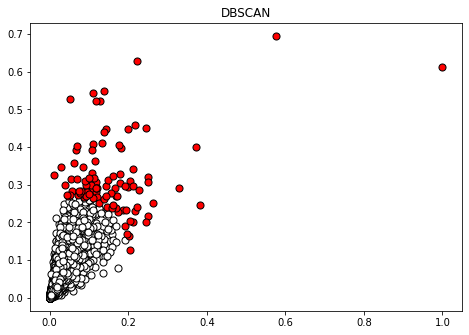

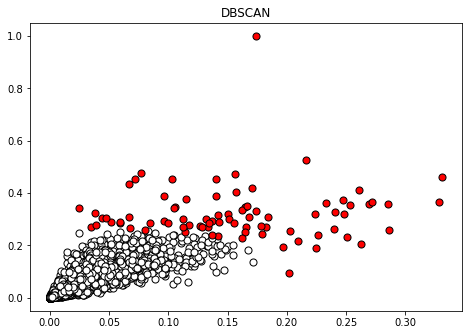

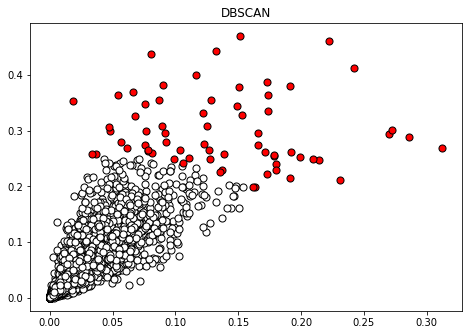

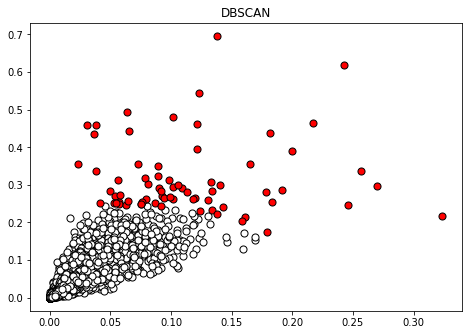

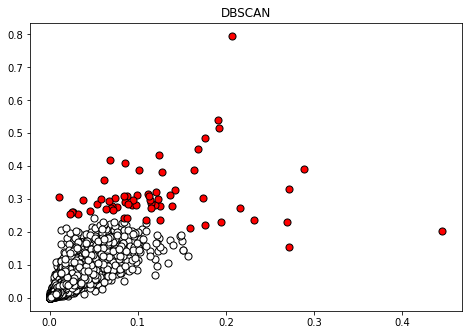

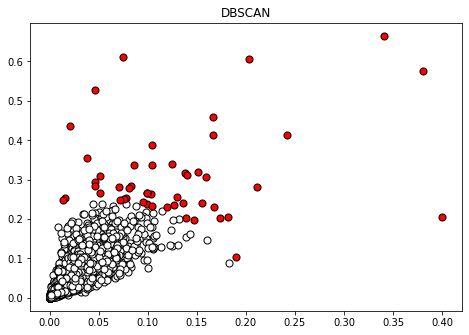

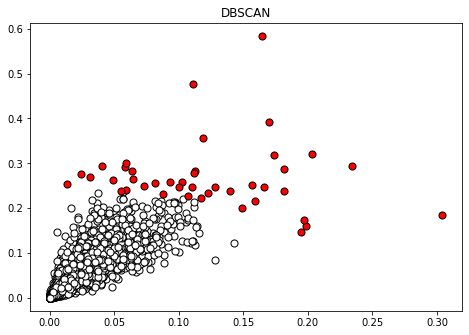

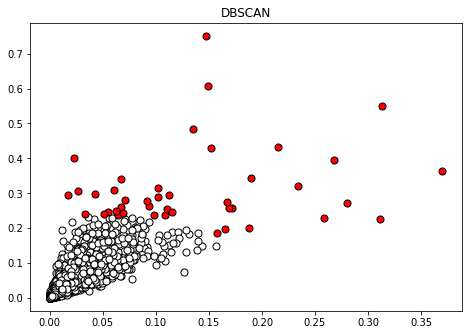

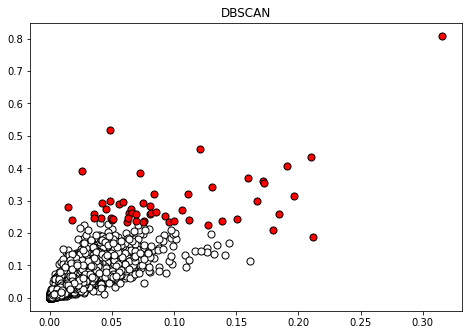

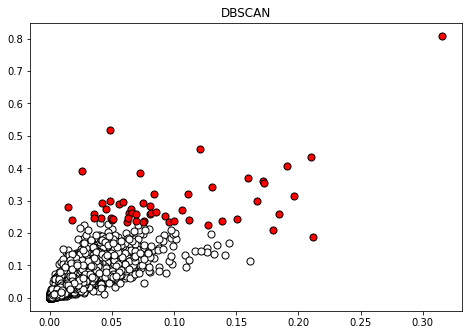

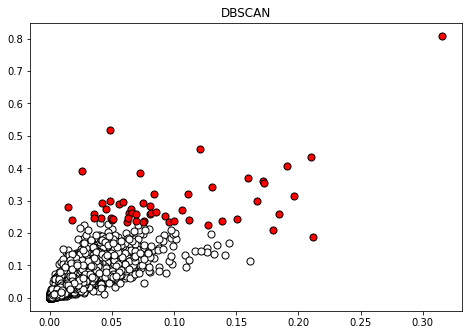

In [30]:
Outliers_DBS = np.asarray(dbscan(train))


In [31]:
res = np.intersect1d(Outliers_EE,np.intersect1d(Outliers_DBS,Outliers_kNN))

final_outliers=np.intersect1d(Outliers_IF,res)
print(final_outliers)

[  102   122   155   157   202   226   430   472   509   580   592   646
   652   662   706   787   799  1054  1249  1688  1765  1837  1994  2027
  2142  2205  2225  2316  2403  2549  3087  3455  3697  3778  3806  3959
  4030  4469  4503  5038  5182  5250  5607  5784  5821  5963  6190  6217
  6253  6445  6629  6830  7676  7740  7837  7970  8158  8180  8352  8527
  8746  9364  9999 10022 10346 10527 10632 10927 12171 12618 13076 13186
 13251 13357 13473 14343 14460 15310 15883 15930 16260 16989 17492 17547
 17698 18167 18228 18285 18315 18531 18826 18939 19166 20059 20265 20596
 21448 21472 21548 21805 22000 22280 22376 23292 23294 23575 24350 24614
 25555 26818 29382 30788 31932 32139 33066 33899 34393 35026 35042 36284
 37113 37133 37189 37195 37955 38667 39289 39380 39894 40519 41428 43094
 43844 44072 44217 44531 45539 47603 48488 49269 49523 49526 49911 52058
 52500 54766 55318 56970 57331 59433 60994 61339 64208 65994 66014 68098
 70972 72980 73460 73554 74021 74063 75954 76197 76

In [32]:
hackers=np.union1d(hackers,final_outliers)
print(hackers)

[2.4000e+01 2.5000e+01 5.0000e+01 6.0000e+01 6.6000e+01 8.0000e+01
 8.8000e+01 9.3000e+01 9.4000e+01 1.0200e+02 1.2100e+02 1.2200e+02
 1.2500e+02 1.4600e+02 1.5500e+02 1.5600e+02 1.5700e+02 1.6200e+02
 1.6900e+02 1.7300e+02 1.9400e+02 2.0200e+02 2.2600e+02 2.8100e+02
 3.0700e+02 3.0800e+02 3.2500e+02 3.4000e+02 3.5300e+02 3.9300e+02
 4.0600e+02 4.3000e+02 4.4800e+02 4.5300e+02 4.7200e+02 5.0500e+02
 5.0900e+02 5.2300e+02 5.3200e+02 5.3900e+02 5.4500e+02 5.8000e+02
 5.9200e+02 6.1300e+02 6.2800e+02 6.3200e+02 6.4600e+02 6.5200e+02
 6.5500e+02 6.6200e+02 6.7100e+02 6.9000e+02 7.0600e+02 7.8700e+02
 7.8900e+02 7.9900e+02 8.1500e+02 8.2200e+02 8.4000e+02 8.4300e+02
 9.0000e+02 9.3600e+02 1.0240e+03 1.0540e+03 1.0700e+03 1.0780e+03
 1.1070e+03 1.2370e+03 1.2490e+03 1.4220e+03 1.4300e+03 1.5210e+03
 1.6050e+03 1.6340e+03 1.6880e+03 1.6890e+03 1.7650e+03 1.7770e+03
 1.8370e+03 1.9530e+03 1.9940e+03 2.0270e+03 2.0940e+03 2.1390e+03
 2.1420e+03 2.1470e+03 2.2050e+03 2.2250e+03 2.2690e+03 2.2900

In [33]:
all_data=pd.read_csv('/content/drive/MyDrive/Thesis_PUBG/Solo_data.csv')
print(all_data.shape)
all_data.head()
solo_data=all_data.iloc[:,1:]
print(solo_data.shape)
solo_data.head()



(87898, 7)
(87898, 6)


,solo_Wins,solo_Rating,solo_Kills,solo_WalkDistance,solo_RideDistance,solo_MoveDistance
0,0.028302,0.290137,0.007955,0.011768,0.006129,0.008713
1,0.056604,0.453945,0.021515,0.019476,0.026227,0.025571
2,0.000000,0.136867,0.003254,0.002580,0.001710,0.002164
3,0.037736,0.410651,0.010125,0.007152,0.006747,0.007391
4,0.018868,0.345063,0.007594,0.006809,0.004991,0.006043


In [35]:
size_of_column=int(solo_data['solo_Kills'].size)
new_class=np.zeros(size_of_column)
new_class[final_outliers]=1
solo_data['solo_Kills'].size
solo_data['HackerOrNot']=new_class

In [41]:
a=np.where(solo_data['HackerOrNot']==1)
#solo_data.head
print(np.unique(solo_data['HackerOrNot'].values))

[0. 1.]


In [82]:
input_data = solo_data.values
x_data = input_data[:,:-1]
y_data = input_data[:,-1]
print(x_data.shape,y_data.shape)

(87898, 6) (87898,)


In [83]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.10)
cls = svm.SVC()
cls.fit(X_train,y_train)
pred = cls.predict(X_test)


In [89]:
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(np.array(y_test),y_pred=pred, pos_label='positive'
                                          , average='micro'))
#recall score
print("recall" , metrics.recall_score(np.array(y_test),y_pred=pred, pos_label='positive'
                                          , average='micro'))
print(metrics.classification_report(np.array(y_test), y_pred=pred))

acuracy: 0.9989761092150171
precision: 0.9989761092150171
recall 0.9989761092150171
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8768
         1.0       0.84      0.73      0.78        22

    accuracy                           1.00      8790
   macro avg       0.92      0.86      0.89      8790
weighted avg       1.00      1.00      1.00      8790



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [85]:
print(np.where(np.array(y_test) == 1))
print(np.where(pred == 1))

(array([1173, 1350, 1674, 1801, 2458, 2765, 2766, 3184, 3466, 4123, 4907,
       5084, 5177, 5721, 5745, 6089, 6474, 6795, 7358, 8395, 8441, 8725]),)
(array([1350, 1674, 1801, 2458, 2765, 2766, 2774, 3184, 5084, 5177, 5721,
       5745, 6089, 6410, 6474, 6795, 6915, 7358, 8725]),)


In [87]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
predict=clf.predict(X_test)

In [69]:
print(predict[:10])
print(y_test[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
86274    0.0
82319    0.0
41565    0.0
78914    0.0
38854    0.0
9795     0.0
82684    0.0
69327    0.0
60897    0.0
57745    0.0
Name: HackerOrNot, dtype: float64


In [71]:
np.array(y_test).shape

(7032,)